### Importando base de dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("tips_atualizado.csv")

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
dados.shape

(3416, 6)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  3416 non-null   float64
 1   tip         3416 non-null   float64
 2   dessert     3416 non-null   object 
 3   day         3416 non-null   object 
 4   time        3416 non-null   object 
 5   size        3416 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 160.2+ KB


In [6]:
dados.describe().round(2)

,total_bill,tip,size
count,3416.00,3416.00,3416.00
mean,19.82,2.71,2.57
std,8.98,1.08,0.95
min,2.80,0.77,1.00
25%,13.39,1.92,2.00
50%,17.80,2.55,2.00
75%,24.33,3.29,3.00
max,55.80,10.00,6.00


### Tradução

In [7]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
dados = dados.set_axis(['Total da conta', 'Gorjeta', 'Sobremesa', 'Dia da semana', 'Horario', 'Quantidade de pessoas'], axis=1)
dados

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [9]:
dados['Sobremesa'].replace(['No', 'Yes'], ['Não', 'Sim'], inplace=True)
dados['Dia da semana'].replace(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'], ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab'], inplace=True)
dados['Horario'].replace(['Dinner', 'Lunch'], ['Jantar', 'Almoço'], inplace=True)
dados

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.990000,1.010000,Não,Dom,Jantar,2
1,10.340000,1.660000,Não,Dom,Jantar,3
2,21.010000,3.500000,Não,Dom,Jantar,3
3,23.680000,3.310000,Não,Dom,Jantar,2
4,24.590000,3.610000,Não,Dom,Jantar,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sab,Jantar,3
3412,25.531567,1.604021,Sim,Sab,Jantar,2
3413,21.547132,1.733914,Sim,Sab,Jantar,2
3414,18.966233,1.718951,Não,Sab,Jantar,2


### Importando o Seaborn

In [10]:
import seaborn as sns

### Análise 1 - Valor da conta e gorjeta

In [11]:
dados.columns

Index(['Total da conta', 'Gorjeta', 'Sobremesa', 'Dia da semana', 'Horario',
       'Quantidade de pessoas'],
      dtype='object')

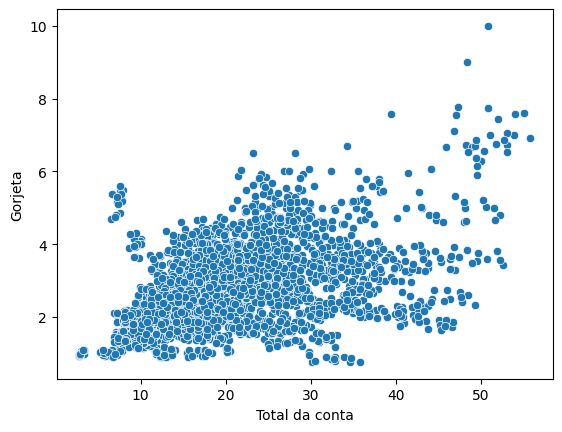

In [12]:
ax = sns.scatterplot(x='Total da conta', y='Gorjeta', data=dados)

**Visualmente o valor da gojeta aumenta conforme o valor da conta aumenta**

In [13]:
print(f'A base de dados contem {dados.shape[0]} registros')
print(f'Quantidade de registros não nulos:\n{dados.count()}')

A base de dados contem 3416 registros
Quantidade de registros não nulos:
Total da conta           3416
Gorjeta                  3416
Sobremesa                3416
Dia da semana            3416
Horario                  3416
Quantidade de pessoas    3416
dtype: int64


#### Criando o campo porcentagem

In [14]:
dados.head(1)

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas
0,16.99,1.01,Não,Dom,Jantar,2


In [15]:
dados['Porcentagem'] = dados['Gorjeta'] / dados['Total da conta']

In [16]:
dados.head(1)

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059447


In [17]:
dados.Porcentagem = dados.Porcentagem.round(2)

In [18]:
dados.head()

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15


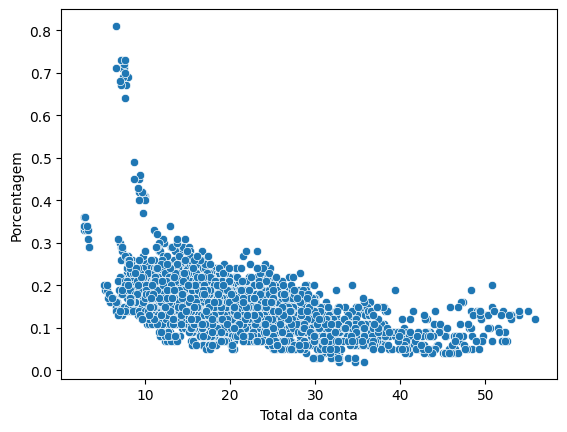

In [19]:
ax = sns.scatterplot(x='Total da conta', y='Porcentagem', data=dados)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


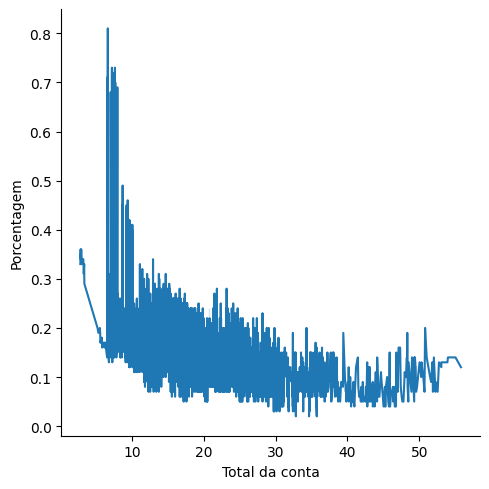

In [20]:
ax = sns.relplot(x='Total da conta', y='Porcentagem', data=dados, kind='line')

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


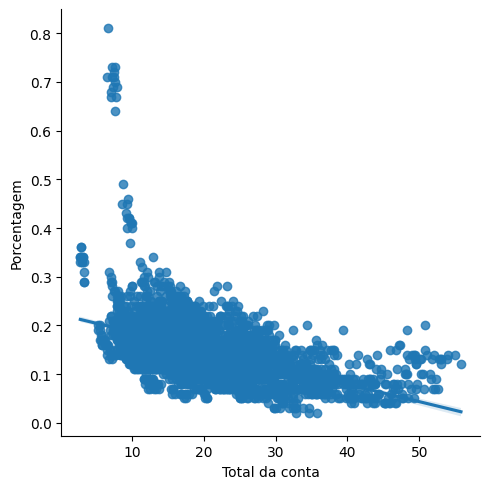

In [21]:
ax = sns.lmplot(x='Total da conta', y='Porcentagem', data=dados)

### Análise 2 - Sobremesa e Gorjeta

In [22]:
dados.head()

,Total da conta,Gorjeta,Sobremesa,Dia da semana,Horario,Quantidade de pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15


In [23]:
dados.loc[dados.Sobremesa == 'Sim'].describe().round(2)

,Total da conta,Gorjeta,Quantidade de pessoas,Porcentagem
count,1302.00,1302.00,1302.00,1302.00
mean,20.80,2.71,2.41,0.15
std,9.90,1.16,0.81,0.09
min,2.80,0.77,1.00,0.02
25%,13.50,1.91,2.00,0.09
50%,17.92,2.43,2.00,0.15
75%,26.81,3.33,3.00,0.19
max,55.80,10.00,5.00,0.81


In [24]:
dados.loc[dados.Sobremesa == 'Não'].describe().round(2)

,Total da conta,Gorjeta,Quantidade de pessoas,Porcentagem
count,2114.00,2114.00,2114.00,2114.00
mean,19.22,2.71,2.67,0.15
std,8.32,1.02,1.01,0.04
min,6.53,0.91,1.00,0.04
25%,13.28,1.93,2.00,0.12
50%,17.74,2.61,2.00,0.15
75%,22.75,3.28,3.00,0.18
max,53.09,9.00,6.00,0.33


/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


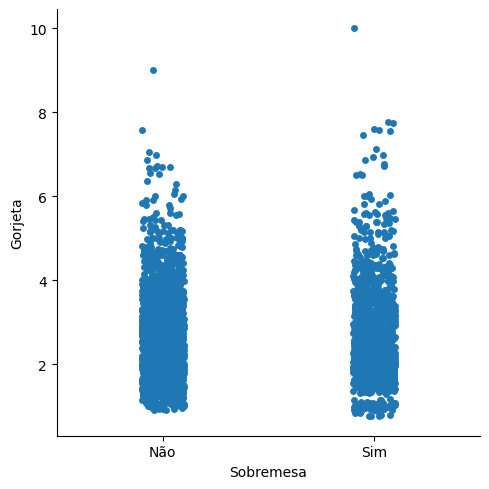

In [25]:
sns.catplot(x='Sobremesa', y='Gorjeta', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


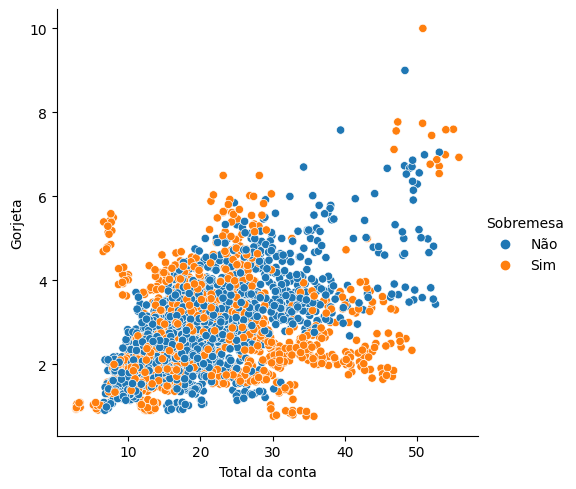

In [26]:
sns.relplot(x='Total da conta', y='Gorjeta', hue='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


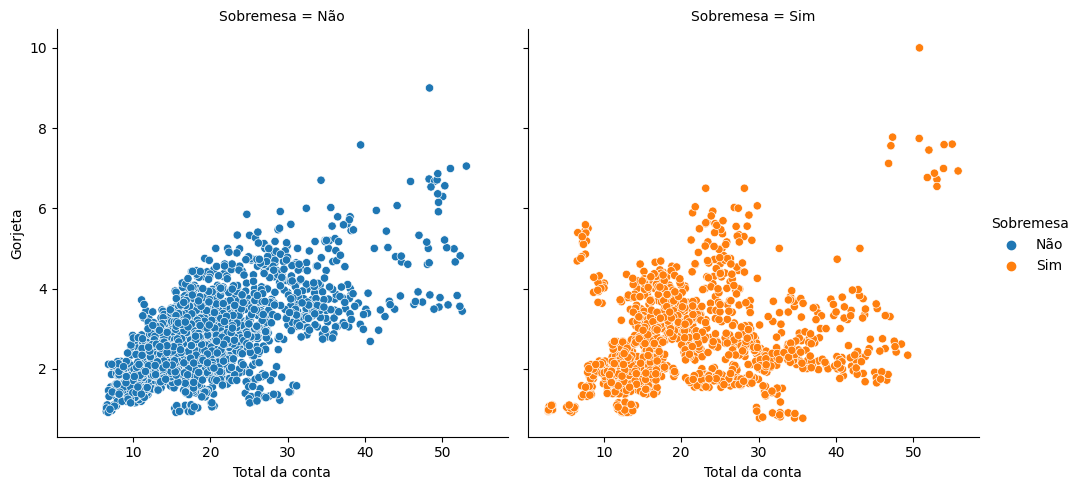

In [27]:
sns.relplot(x='Total da conta', y='Gorjeta', hue='Sobremesa', col='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


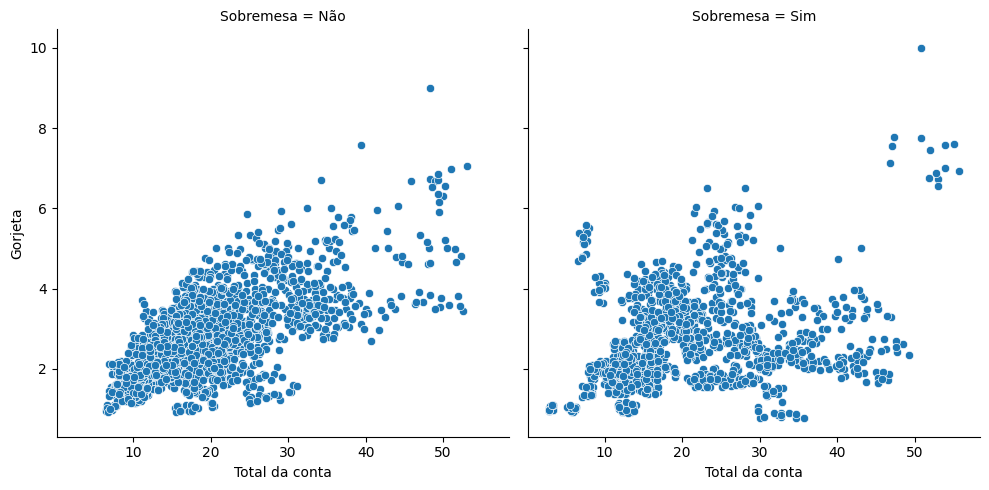

In [28]:
sns.relplot(x='Total da conta', y='Gorjeta', col='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


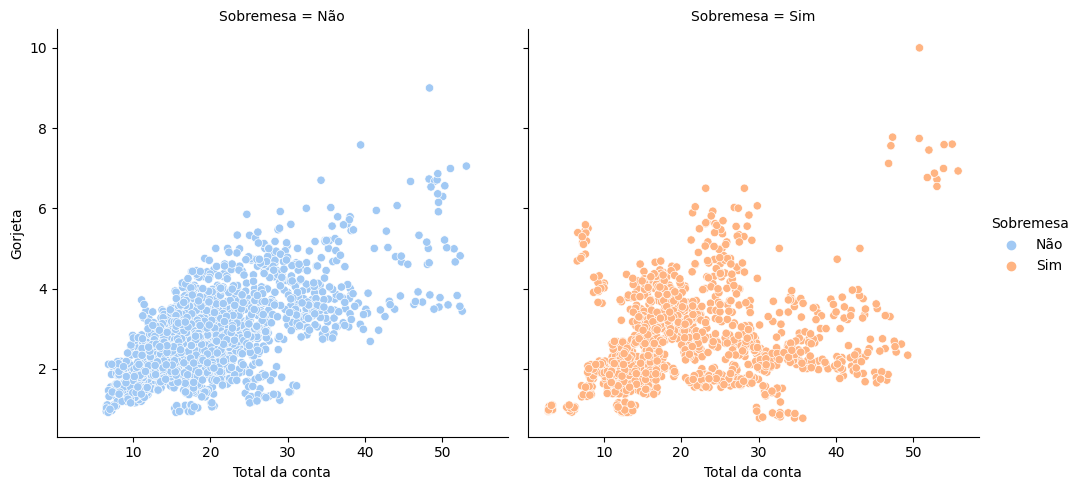

In [29]:
sns.relplot(x='Total da conta', y='Gorjeta', hue='Sobremesa', col='Sobremesa', palette='pastel', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


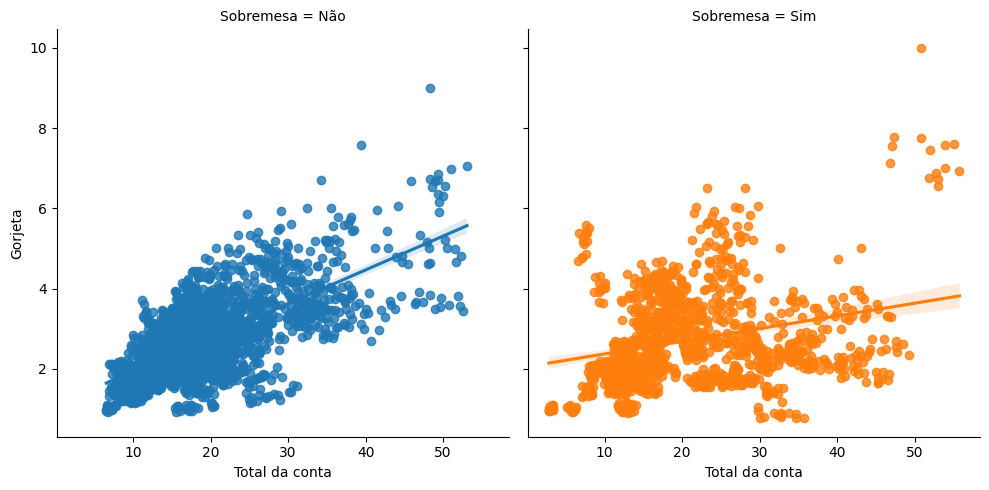

In [30]:
sns.lmplot(x='Total da conta', y='Gorjeta', col='Sobremesa', hue='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


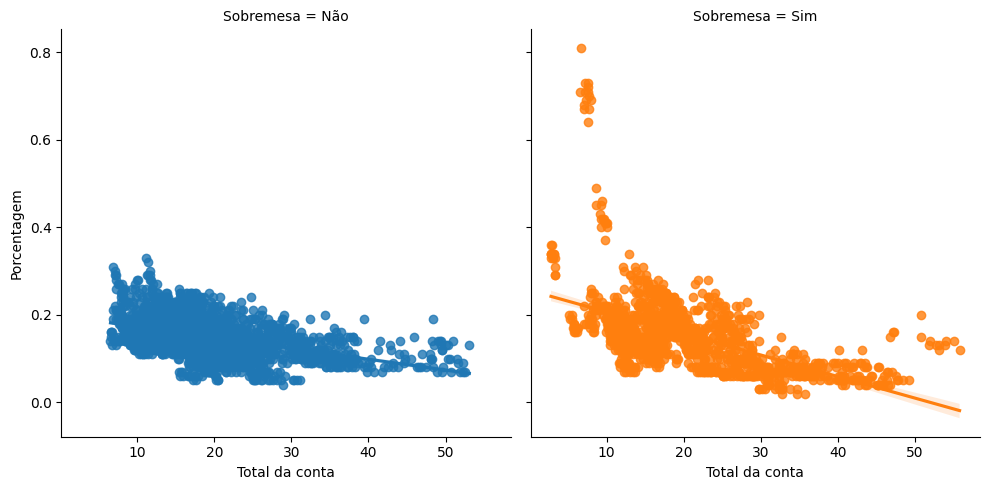

In [31]:
sns.lmplot(x='Total da conta', y='Porcentagem', col='Sobremesa', hue='Sobremesa', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


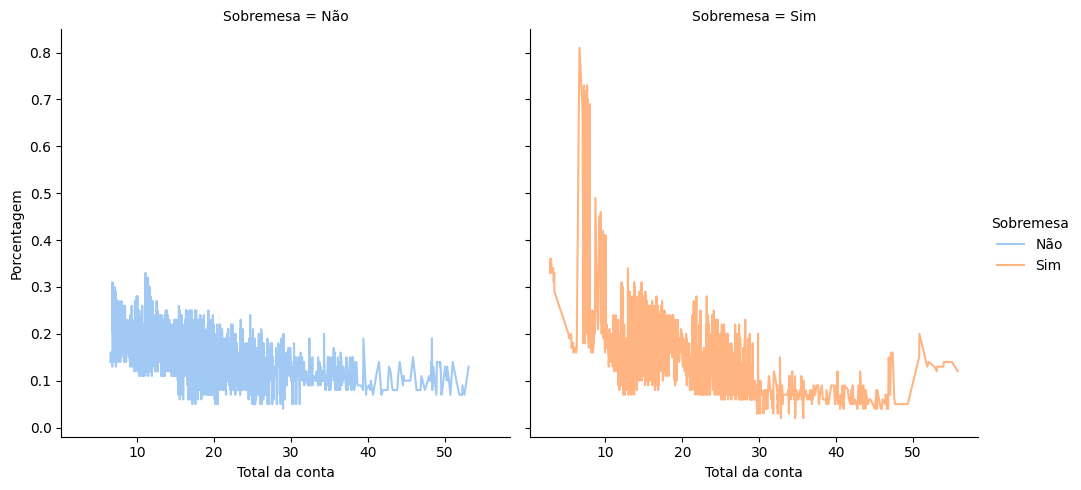

In [32]:
sns.relplot(x='Total da conta', y='Porcentagem', hue='Sobremesa', col='Sobremesa', kind='line', palette='pastel', data=dados)

**Visualmente existe diferença entre o valor da gorjeta daqueles que pediram sobremesa dos que não pediram**

#### Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [33]:
from scipy.stats import ranksums

In [34]:
sobremesa = dados.query("Sobremesa == 'Sim'").Porcentagem
sobremesa

56      0.08
58      0.16
60      0.16
61      0.14
62      0.18
        ... 
3406    0.18
3408    0.09
3409    0.03
3412    0.06
3413    0.08
Name: Porcentagem, Length: 1302, dtype: float64

In [35]:
sem_sobremesa = dados.query("Sobremesa == 'Não'").Porcentagem
sem_sobremesa

0       0.06
1       0.16
2       0.17
3       0.14
4       0.15
        ... 
3407    0.12
3410    0.09
3411    0.18
3414    0.09
3415    0.16
Name: Porcentagem, Length: 2114, dtype: float64

In [36]:
r = ranksums(sobremesa, sem_sobremesa)
print(f"O valor do p valor é {r[1]}")

O valor do p valor é 0.033144013617673405


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

### Análise 3 - Dia da semana e Gorjeta

In [37]:
dados['Dia da semana'].unique()

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


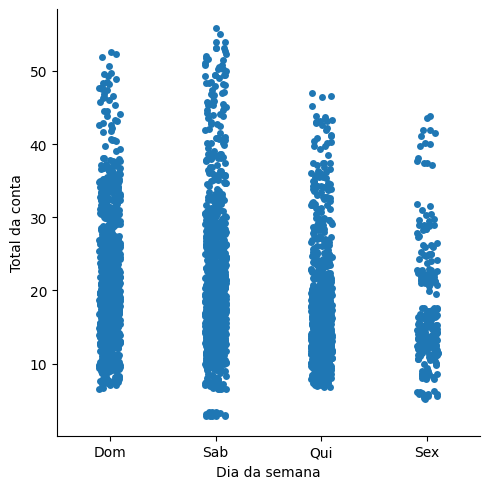

In [38]:
sns.catplot(x='Dia da semana', y='Total da conta', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


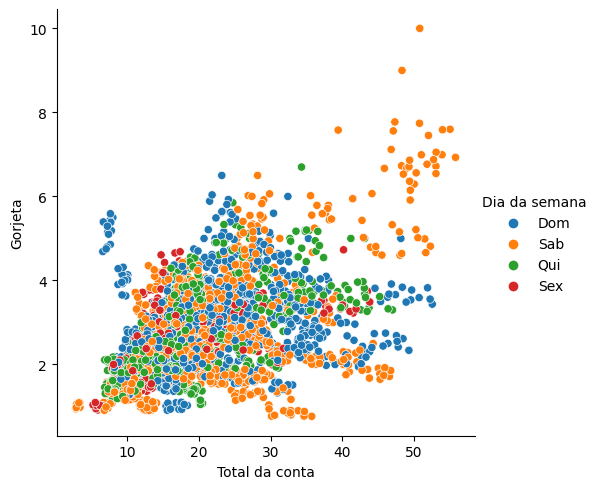

In [39]:
sns.relplot(x="Total da conta", y="Gorjeta", hue="Dia da semana", data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


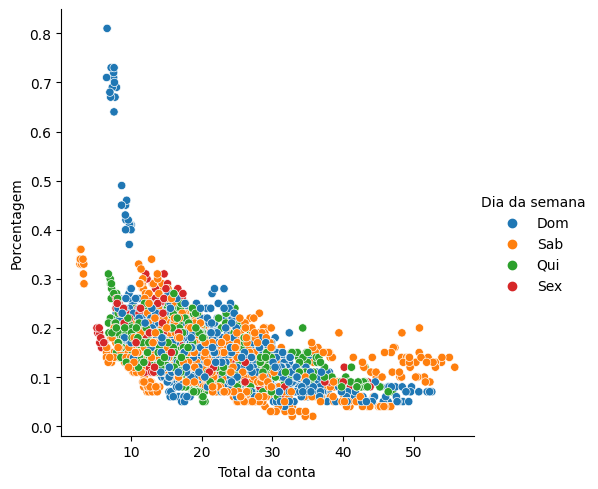

In [40]:
sns.relplot(x="Total da conta", y="Porcentagem", hue="Dia da semana", data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


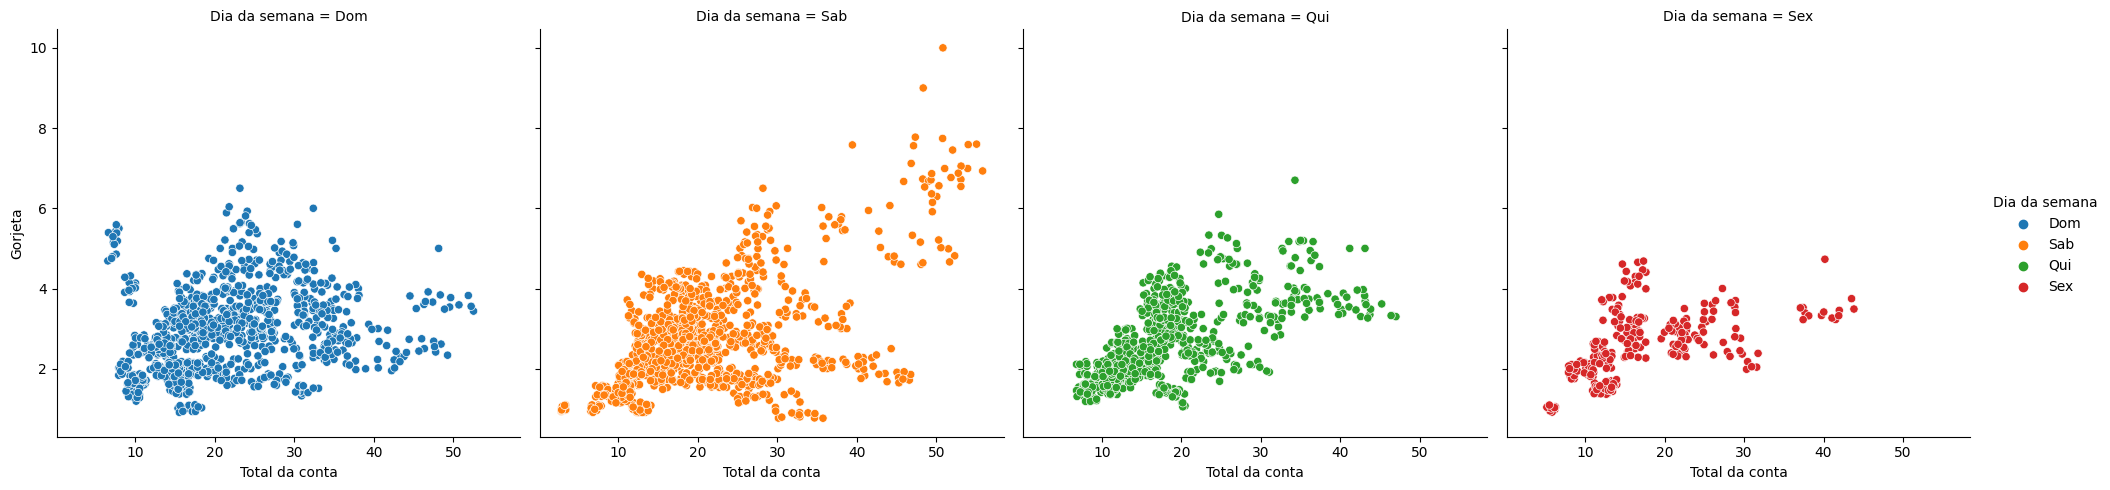

In [41]:
sns.relplot(x="Total da conta", y="Gorjeta", hue="Dia da semana", col="Dia da semana", data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


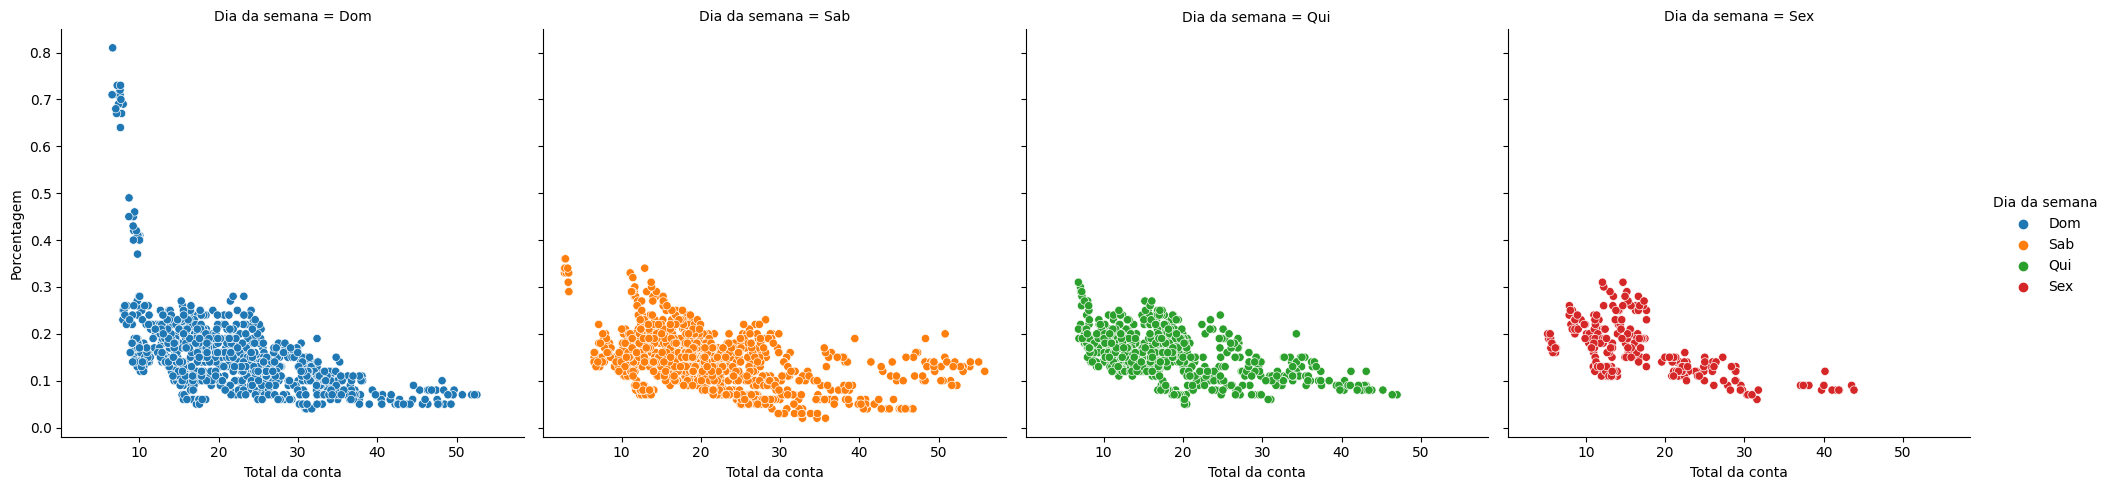

In [42]:
sns.relplot(x="Total da conta", y="Porcentagem", hue="Dia da semana", col="Dia da semana", data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


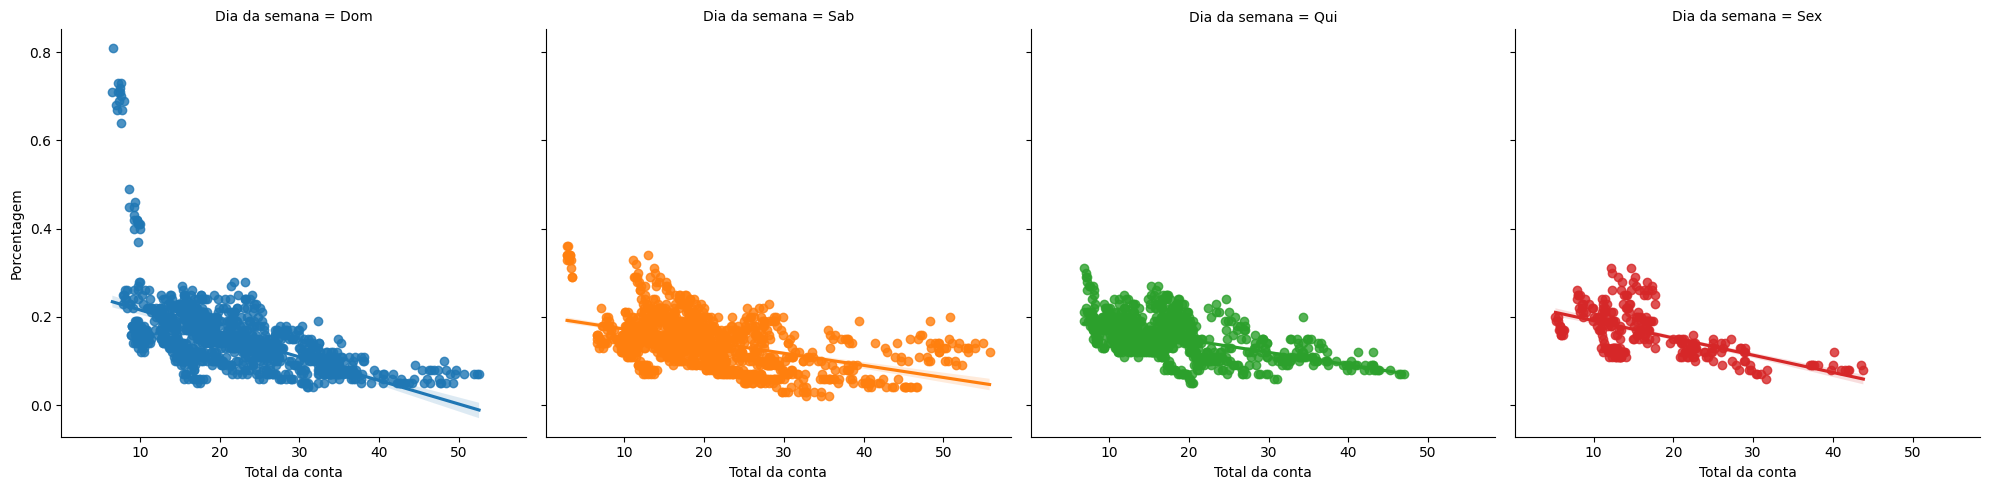

In [43]:
sns.lmplot(x="Total da conta", y="Porcentagem", hue="Dia da semana", col="Dia da semana", data=dados)

In [44]:
media_geral_gorjeta = dados.Gorjeta.mean()
print(f"A média geral das gorjetas é {media_geral_gorjeta}")

A média geral das gorjetas é 2.711189214091612


In [45]:
dados.groupby('Dia da semana').mean(numeric_only=True)[['Total da conta', 'Gorjeta', 'Porcentagem']]

,Total da conta,Gorjeta,Porcentagem
Dia da semana,,,
Dom,21.439133,2.902079,0.154953
Qui,17.724088,2.556177,0.154090
Sab,20.480249,2.690114,0.143604
Sex,17.215616,2.549960,0.163158


In [46]:
print("Frequência dos dias")
dados['Dia da semana'].value_counts()

Frequência dos dias


Dia da semana
Sab    1218
Dom    1064
Qui     868
Sex     266
Name: count, dtype: int64

#### Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é a mesma no sábado e no domingo**

**H<sup>alt</sup>**
> **A distribuição do valor da conta é diferente no sábado e no domingo**

In [47]:
valor_conta_domingo = dados.query("`Dia da semana` == 'Dom'")['Total da conta']
valor_conta_domingo

0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3358    21.989267
3359    32.406667
3360    18.516067
3361    21.521342
3362    14.232724
Name: Total da conta, Length: 1064, dtype: float64

In [48]:
valor_conta_sabado = dados.query("`Dia da semana` == 'Sab'")['Total da conta']
valor_conta_sabado

19      20.650000
20      17.920000
21      20.290000
22      15.770000
23      39.420000
          ...    
3410    38.663518
3411    26.330845
3412    25.531567
3413    21.547132
3414    18.966233
Name: Total da conta, Length: 1218, dtype: float64

In [49]:
r = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f"O p valor é {r.pvalue}")

O p valor é 0.0004435935681441821


### Análise 4 - Horário e Gorjeta

In [50]:
dados.Horario.unique()

array(['Jantar', 'Almoço'], dtype=object)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


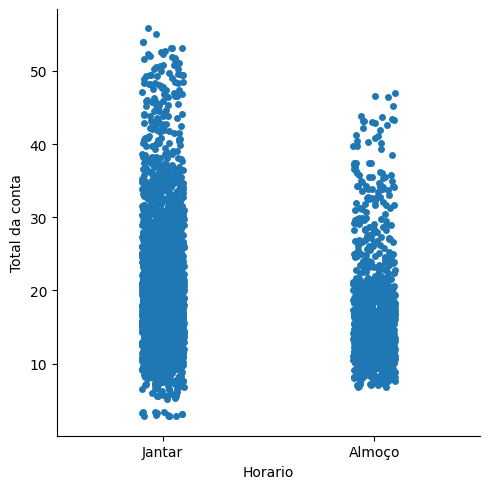

In [51]:
sns.catplot(x='Horario', y='Total da conta', data=dados)

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


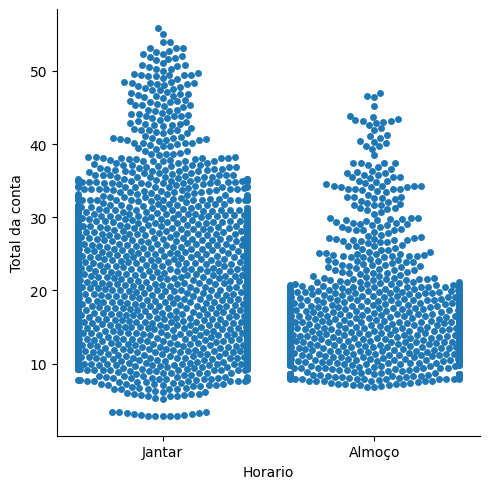

In [52]:
sns.catplot(x='Horario', y='Total da conta', data=dados, kind='swarm')

<Axes: xlabel='Horario', ylabel='Total da conta'>

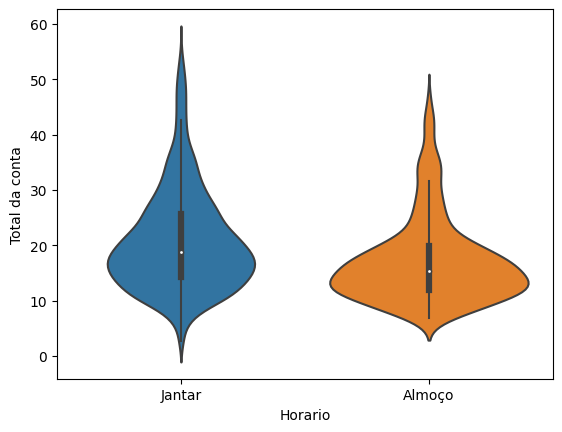

In [53]:
sns.violinplot(x='Horario', y='Total da conta', data=dados)

<Axes: xlabel='Horario', ylabel='Total da conta'>

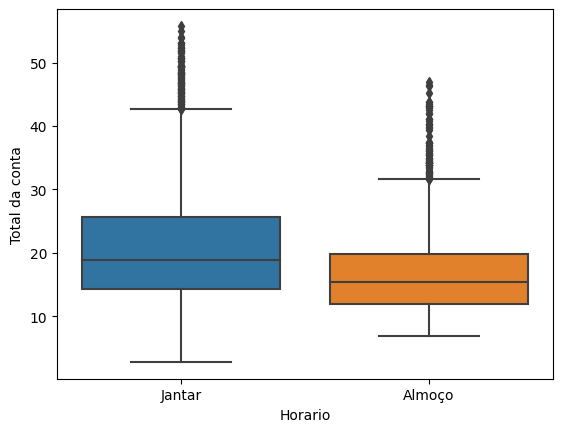

In [54]:
sns.boxplot(x='Horario', y='Total da conta', data=dados)

In [55]:
almoco = dados.query("Horario == 'Almoço'")['Total da conta']
almoco

77      27.200000
78      22.760000
79      17.290000
80      19.440000
81      16.660000
          ...    
3394     8.057385
3395    16.753736
3396    13.334323
3397    15.724707
3398    10.730000
Name: Total da conta, Length: 952, dtype: float64

/tmp/ipykernel_14868/158998250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(almoco)


<Axes: xlabel='Total da conta', ylabel='Density'>

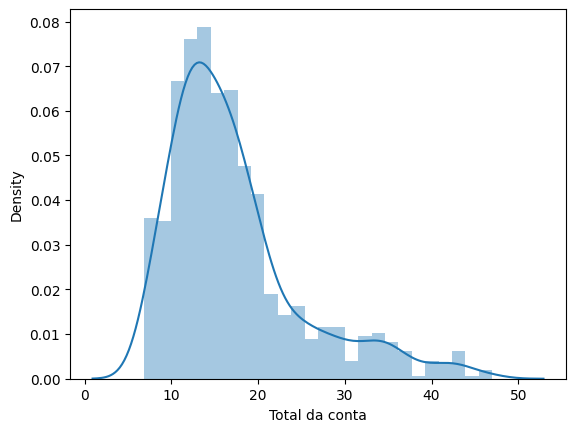

In [56]:
sns.distplot(almoco)

/tmp/ipykernel_14868/2804559813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(almoco, kde=False)


<Axes: xlabel='Total da conta'>

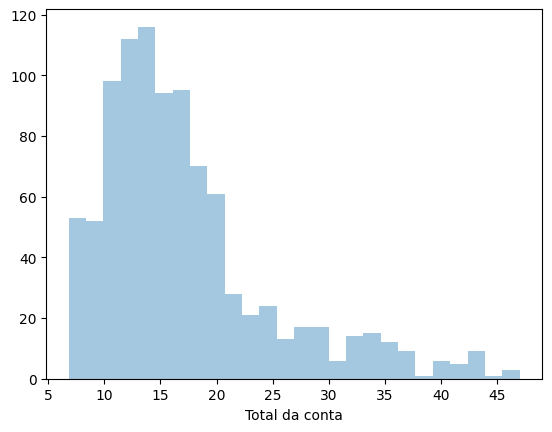

In [57]:
sns.distplot(almoco, kde=False)

In [58]:
jantar = dados.query("Horario == 'Jantar'")['Total da conta']
jantar

0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3411    26.330845
3412    25.531567
3413    21.547132
3414    18.966233
3415    18.079740
Name: Total da conta, Length: 2464, dtype: float64

/tmp/ipykernel_14868/2312704387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jantar)


<Axes: xlabel='Total da conta', ylabel='Density'>

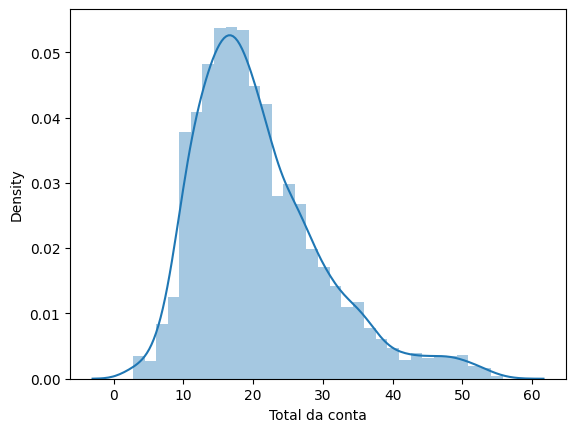

In [59]:
sns.distplot(jantar)

/tmp/ipykernel_14868/1562516539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jantar, kde=False)


<Axes: xlabel='Total da conta'>

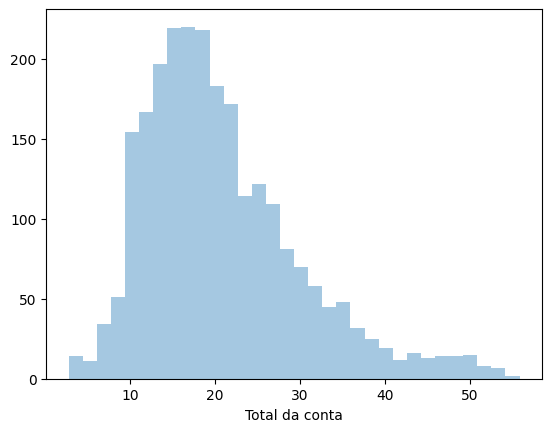

In [60]:
sns.distplot(jantar, kde=False)

In [61]:
dados.groupby(['Horario']).mean(numeric_only=True)[['Total da conta', 'Gorjeta', 'Porcentagem']]

,Total da conta,Gorjeta,Porcentagem
Horario,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


#### Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é a mesma no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da conta é diferente no jantar e no almoço**

In [62]:
r = ranksums(jantar, almoco)
print(f"O p valor é {r.pvalue}")

O p valor é 5.169201062207143e-34


**H<sup>alt</sup>**
> **A distribuição do valor da conta é diferente no jantar e no almoço**

#### Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta é diferente no jantar e no almoço**

In [63]:
porcentagem_almoco = dados.query("Horario == 'Almoço'").Porcentagem
porcentagem_almoco

77      0.15
78      0.13
79      0.16
80      0.15
81      0.20
        ... 
3394    0.25
3395    0.19
3396    0.12
3397    0.15
3398    0.17
Name: Porcentagem, Length: 952, dtype: float64

In [64]:
porcentagem_jantar = dados.query("Horario == 'Jantar'").Porcentagem
porcentagem_jantar

0       0.06
1       0.16
2       0.17
3       0.14
4       0.15
        ... 
3411    0.18
3412    0.06
3413    0.08
3414    0.09
3415    0.16
Name: Porcentagem, Length: 2464, dtype: float64

In [65]:
r = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f"O p valor é {r[1]}")

O p valor é 1.3785725618355523e-11


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma no jantar e no almoço**